In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D



In [2]:
bdd = pd.read_spss('BddSPSS3.sav')
bdd = bdd.rename(columns={'Groupedechirurgie_C3' : 'Third Surgery Type','IMCmax': 'Maximun','IMCpréC1':'Before S1','IMCnadirC1':'Nadir S1','IMCpréC2':'Before S2', 'IMCnadirC2':'Nadir S2','IMCpréC3':'Before S3', 'IMCnadirC3':'Nadir S3', 'IMCpréC4':'Last News'})

In [ ]:
bdd.head()

In [ ]:
print(list(bdd.columns.tolist()))

In [3]:
BMI = pd.melt(bdd, id_vars=['Third Surgery Type'], value_vars=['Maximun','Before S1','Nadir S1','Before S2', 'Nadir S2','Before S3', 'Nadir S3','Last News'], var_name='BMI evolution during successive bariatric procedures', value_name='Body Mass Index kg.m$^{-2}$')
BMI.head()

,Third Surgery Type,BMI evolution during successive bariatric procedures,Body Mass Index kg.m$^{-2}$
0,Restrictive Surgery,Maximun,46.921383
1,Roux-Y ByPass,Maximun,45.179103
2,Roux-Y ByPass,Maximun,43.967784
3,Roux-Y ByPass,Maximun,45.359905
4,Roux-Y ByPass,Maximun,55.377556


In [ ]:

sns.lineplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMI,  color = 'm', sort = False, err_style="bars", markers=True, LineWidth = 3)
plt.xticks(rotation=70)
sns.despine()

plt.savefig('EvolutionGlobal.png', orientation = 'landscape', bbox_inches = 'tight',  dpi=900)
plt.savefig('EvolutionGlobal.pdf', orientation = 'landscape', bbox_inches = 'tight',  dpi=1200)

In [ ]:

sns.lineplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMI, sort = False, color = 'm', err_style="bars", markers=True, LineWidth = 3)
sns.stripplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMI, jitter=True, marker='o', alpha=0.3,color='grey')
plt.xticks(rotation=70)
sns.despine()

plt.savefig('EvolutionGlobal2.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionGlobal2.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

sns.lineplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMI, sort = False, color = 'b', err_style="bars", markers=True, LineWidth = 3)
sns.stripplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMI, jitter=True, marker='o', alpha=0.3,color='grey')
plt.xticks(rotation=70)
sns.despine()

plt.savefig('EvolutionGlobal1.tiff', orientation = 'landscape', bbox_inches = 'tight', dpi=1000)
plt.savefig('EvolutionGlobal1.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:
BMIres = BMI.loc[BMI['Third Surgery Type'] == 'Restrictive Surgery']
BMIby = BMI.loc[BMI['Third Surgery Type'] == 'Roux-Y ByPass']
BMIdp = BMI.loc[BMI['Third Surgery Type'] == 'DBP or SADI']

In [ ]:

g = sns.stripplot(x='BMI evolution during successive bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMIby, color='c',marker='D', jitter=True, alpha=0.4)
sns.stripplot(x='BMI evolution during successive bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMIres, color='r',marker='o', jitter=True, alpha=0.5)
sns.stripplot(x='BMI evolution during successive bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMIdp, color='m',marker='^', jitter=True, alpha=0.5)
sns.lineplot(x='BMI evolution during successive bariatric procedures', y='Body Mass Index kg.m$^{-2}$', sort = False, data=BMI,  color = 'b', err_style="bars", markers=True, LineWidth = 3)

plt.xticks( rotation=70)
plt.axhline(35, ls='--', color = 'grey', alpha = 0.5)
g.set(ylim=(15,75))

custom_lines = [Line2D([], [],marker='o', color='r', label='Restrictive surgery',linestyle='None'),
                Line2D([], [],marker='D', color='c', label='Gastric Bypass',linestyle='None'),
                Line2D([], [],marker='^', color='m', label='BPD-DS or SADI',linestyle='None')]
g.legend(handles=custom_lines, bbox_to_anchor=(0.7, 0.75), ncol=1, title = 'Third Surgery Group', )


sns.despine()

plt.savefig('EvolutionGlobal_finale.tiff', orientation = 'landscape', bbox_inches = 'tight', dpi=1000)
plt.savefig('EvolutionGlobal_finale.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:
ColorSurg = ('r','c','m')
sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', data=BMI, sort =False, markers=True, color = 'm')
plt.xticks(rotation=70)
sns.despine()

plt.savefig('EvolutionGlobal4.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionGlobal4.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:
ColorSurg = ('r','c','m')
MarkerSurg = ('o','D','^')

g = sns.lineplot(x='BMI evolution during successive bariatric procedures', y='Body Mass Index kg.m$^{-2}$', sort = False, hue='Third Surgery Type',style = 'Third Surgery Type' , palette = ColorSurg, dashes = False, data=BMI,  err_style="bars", markers=MarkerSurg)

plt.xticks( rotation=70)
plt.axhline(35, ls='--', color = 'grey',alpha=0.5)
g.set(ylim=(15,75))

custom_lines = [Line2D([], [],marker='o', color='r', label='Restrictive surgery',linestyle='None'),
                Line2D([], [],marker='D', color='c', label='Gastric Bypass',linestyle='None'),
                Line2D([], [],marker='^', color='m', label='BPD-DS or SADI',linestyle='None')]
g.legend(handles=custom_lines, bbox_to_anchor=(0.7, 0.75), ncol=1, title = 'Third Surgery Group', )

sns.despine()

plt.savefig('EvolutionSurgery_finale.tiff', orientation = 'landscape', bbox_inches = 'tight', dpi=1000)
plt.savefig('EvolutionSurgery_finale.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:
fig, ax =plt.subplots(1,2)



g = sns.stripplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMIby, color='c',marker='D', jitter=True, alpha=0.4, ax=ax[0])
g = sns.stripplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMIres, color='r',marker='o', jitter=True, alpha=0.5, ax=ax[0])
g = sns.stripplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$', data=BMIdp, color='m',marker='^', jitter=True, alpha=0.5, ax=ax[0])
g = sns.lineplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$', sort = False, data=BMI,  color = 'b', err_style="bars", markers=True, LineWidth = 3, ax=ax[0])

g = plt.xticks( rotation=70)
g = plt.axhline(35, ls='--', color = 'grey', alpha = 0.5)
g.set(ylim=(15,75))

custom_lines = [Line2D([], [],marker='o', color='r', label='Restrictive surgery',linestyle='None'),
                Line2D([], [],marker='D', color='c', label='Roux-Y ByPass',linestyle='None'),
                Line2D([], [],marker='^', color='m', label='BPD-DS or SADI',linestyle='None')]
g.legend(handles=custom_lines, bbox_to_anchor=(0.7, 0.75), ncol=1, title = 'Third Surgery Group', )


sns.despine()

plt.savefig('EvolutionGlobal3.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionGlobal3.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)



In [ ]:
sns.catplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', data=BMI, kind="box", palette = 'pastel', boxprops=dict(alpha=.5))
sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', data=BMI, sort = False, color = 'b', err_style="bars", markers=True, LineWidth = 4)
plt.xticks(rotation=70)

plt.savefig('EvolutionGlobal5.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionGlobal5.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:
sns.catplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', data=BMI, kind="violin", color='white', inner='stick')
sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', data=BMI, sort=False, color = 'b', err_style="bars", markers=True, LineWidth = 4)
plt.xticks(rotation=75)

plt.savefig('EvolutionGlobal6.png', orientation = 'landscape', bbox_inches = 'tight',  dpi=900)
plt.savefig('EvolutionGlobal6.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:
sns.catplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', data=BMI, kind="violin", palette='pastel', inner='stick', alpha = 0.3)
sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', sort=False, data=BMI,  color = 'b', err_style="bars", markers=True, LineWidth = 4)
plt.xticks(rotation=70)

plt.savefig('EvolutionGlobal7.png',  orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionGlobal7.pdf',  orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:
g = sns.catplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', data=BMI, kind="box", color = 'white', saturation = 5)
sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', sort=False, data=BMI,  color = 'b', err_style="bars", markers=True, LineWidth = 4)
plt.xticks(rotation=70)
g.set(ylim=(15,75))

plt.savefig('EvolutionGlobal8.png',  orientation = 'landscape', bbox_inches = 'tight',dpi=900)
plt.savefig('EvolutionGlobal8.pdf',  orientation = 'landscape', bbox_inches = 'tight',dpi=1200)

In [ ]:
g = sns.catplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', data=BMI, kind="swarm", hue = 'Third Surgery Type',alpha = 0.55, palette = 'Set2')
sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$', sort = False, data=BMI,  color = 'b', err_style="bars", markers=True, LineWidth = 4, legend = None)
plt.xticks(rotation=70)
g.set(ylim=(15,75))

plt.savefig('EvolutionGlobal9.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionGlobal9.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

# Partie Statistique


In [ ]:
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
print(list(bdd2.columns.values.tolist()))

In [ ]:
bdd2 = bdd.drop(['Code','PoidspréC4','IMC_Reinholds_PreC4', 'EWL50__PreC4', 'ReiholdsNadir_PreC4','IMC_ReinholdsPreC3','LastNews_Date', 'TimeDN_C3', 'IMC_ReinholdsC3', 'EWL50_C3', 'ReiholdsNadirC3',  'TypeC3', 'ComplicationC3', 'PoidsnadirC3', 'EWL50_PreC3', 'ReiholdsPreC3','IMC_ReinholdsC2', 'EWL50_C2', 'ReiholdsNadirC2', 'IMC_ReinholdsPreC2','MotiféchecC2','DateC2','EWL50_preC2', 'ReiholdsPreC2','IMC_ReinholdsC1', 'EWL50_C1', 'ReiholdsNadirC1', 'TranchesPreC1','PoidspréC2', 'IMCpréC1gt50', 'MotiféchecC1', 'PoidsnadirC1', 'Pdsidéal', 'PdspréC1','Pdsmax', 'Datedenaissance', 'MotiféchecC3','DT2_C3', 'Insuline_C3', 'AnalogueGLP1_C3', 'HbA1c_C3', 'HTA_C3', 'NbTTT_C3', 'SAS_C3', 'AppareillageSAS_C3', 'Dyslipidémie_C3', 'Arthralgies_C3', 'RGO_C3', 'Dyspnéedeffort_C3', 'Stéatosehépatique_C3', 'Massegrasse_C3', 'Tabac_C3', 'OH_C3', 'ATCDpsy_C3', 'TTTpsy_C3', 'DateC3','Third Surgery Type','TypeC2','Sexe','TypeC1','DindoClavienlehautàJ90', 'DindoClavienlehautàJ90_A','DindoClavienlehautàJ90_B','AutresATCD_C3'],1)

In [ ]:
colname = list(bdd2.columns.tolist())

In [ ]:
p = stats.normaltest(bdd2, nan_policy='omit')
data_p = {'Variable':colname, 'p_value':p.pvalue}
data_p = pd.DataFrame(data=data_p)

nonNormal = data_p[data_p['p_value'] < 0.05]

data_p.to_csv('NormalityPvalue.csv')

print(nonNormal)


In [ ]:
l_non = list(nonNormal['Variable'].values.tolist()) 
features = bdd2[l_non]

print(l_non)


In [ ]:
#instatiate 
pt = PowerTransformer(method='yeo-johnson', standardize=False) 

#Fit the data to the powertransformer
skl_yeo = pt.fit(features)

#Lets get the Lambdas that were found
print (skl_yeo.lambdas_)

calc_lambdasYeo = skl_yeo.lambdas_

#Transform the data 
skl_yeo = pt.transform(features)

#Pass the transformed data into a new dataframe 
bdd_yeo = pd.DataFrame(data=skl_yeo, columns=l_non)

print('Valeurs non standardisé :')
print(bdd_yeo.head())


In [ ]:
p2 = stats.normaltest(bdd_yeo, nan_policy='omit')
data_p2 = {'Variable':colname, 'p_value':p.pvalue}
data_p2 = pd.DataFrame(data=data_p)

nonNormal2 = data_p[data_p['p_value'] < 0.05]

data_p2.to_csv('NormalityPvalueYeo.csv')

print(nonNormal2)

# Courbes Reinholds

In [ ]:
BMI2 = pd.melt(bdd, id_vars=['ReiholdsNadirC1'], value_vars=['IMCmax','IMCpréC1','IMCnadirC1','IMCpréC2','IMCnadirC2','IMCpréC3','IMCnadirC3'], var_name='Surgery Evolution', value_name='Body Mass Index kg.m$^{-2}$')
BMI.head()

In [ ]:

g = sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$',sort=False, hue='ReiholdsNadirC1',style = 'ReiholdsNadirC1' , palette='Set2', err_style=None,dashes = False, data=BMI2,   markers=True)
g.legend(bbox_to_anchor=(0.75, 0.75), ncol=1)

plt.xticks(rotation=70)
plt.axhline(35, ls='--')
sns.despine()

plt.savefig('EvolutionSurgeryReinholdC1_1.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionSurgeryReinholdC1_1.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:

g = sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$',sort=False, hue='ReiholdsNadirC1',style = 'ReiholdsNadirC1' , palette='Set2', err_style='bars',dashes = False, data=BMI2,   markers=True)
g.legend(bbox_to_anchor=(0.75, 0.75), ncol=1)

plt.xticks(rotation=70)
plt.axhline(35, ls='--')
sns.despine()

plt.savefig('EvolutionSurgeryReinholdC1_2.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionSurgeryReinholdC1_2.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:

g = sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$',sort=False, hue='ReiholdsNadirC1',style = 'ReiholdsNadirC1' , palette='Set2', dashes = False, data=BMI2,   markers=True)
g.legend(bbox_to_anchor=(0.75, 0.75), ncol=1)

plt.xticks(rotation=70)
plt.axhline(35, ls='--')
sns.despine()

plt.savefig('EvolutionSurgeryReinholdC1_3.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionSurgeryReinholdC1_3.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [4]:
BMI3 = pd.melt(bdd, id_vars=['ReiholdsNadirC2'], value_vars=['Maximun','Before S1','Nadir S1','Before S2', 'Nadir S2','Before S3', 'Nadir S3','Last News' ], var_name='BMI evolution during successive bariatric procedures', value_name='Body Mass Index kg.m$^{-2}$')
BMI4 = pd.melt(bdd, id_vars=['ReiholdsNadirC2'], value_vars=['Maximun','Before S1','Nadir S1','Before S2', 'Nadir S2','Before S3', 'Nadir S3'], var_name='BMI evolution along bariatric procedures', value_name='Body Mass Index kg.m$^{-2}$')


In [5]:

g = sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$',sort=False, hue='ReiholdsNadirC2',style = 'ReiholdsNadirC2' , palette='Set2', err_style=None,dashes = False, data=BMI3,   markers=True)
g.legend(bbox_to_anchor=(0.75, 0.75), ncol=1)

plt.xticks(rotation=70)
plt.axhline(35, ls='--')
sns.despine()

plt.savefig('EvolutionSurgeryReinholdC2_1.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionSurgeryReinholdC2_1.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

ValueError: Could not interpret input 'Surgery Evolution'

In [ ]:

g = sns.lineplot(x='Surgery Evolution', y='Body Mass Index kg.m$^{-2}$',sort=False, hue='ReiholdsNadirC2',style = 'ReiholdsNadirC2' , palette='Set2', err_style='bars',dashes = False, data=BMI3,   markers=True)
g.legend(bbox_to_anchor=(0.75, 0.75), ncol=1)

plt.xticks(rotation=70)
plt.axhline(35, ls='--')
sns.despine()

plt.savefig('EvolutionSurgeryReinholdC2_2.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionSurgeryReinholdC2_2.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

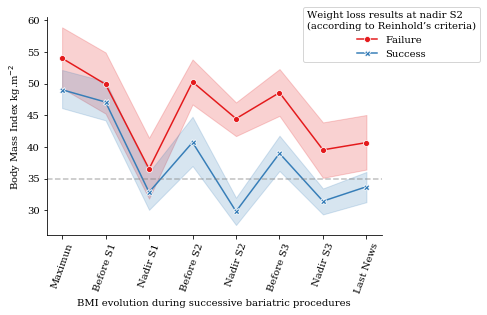

In [7]:
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
g = sns.lineplot(x='BMI evolution during successive bariatric procedures', y='Body Mass Index kg.m$^{-2}$',sort=False, hue='ReiholdsNadirC2',style = 'ReiholdsNadirC2' , palette='Set1', dashes = False, data=BMI3,   markers=True)
g.legend(bbox_to_anchor=(0.75, 0.77), ncol=1, labels=('Failure','Success'), title = "Weight loss results at nadir S2 \n(according to Reinhold’s criteria)" )

plt.xticks(rotation=70)
plt.axhline(35, ls='--', color = 'grey', alpha = 0.5)
sns.despine()

plt.savefig('EvolutionSurgeryReinholdC2_Finale.tiff', orientation = 'landscape', bbox_inches = 'tight', dpi=1000)
plt.savefig('EvolutionSurgeryReinholdC2_Finale.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

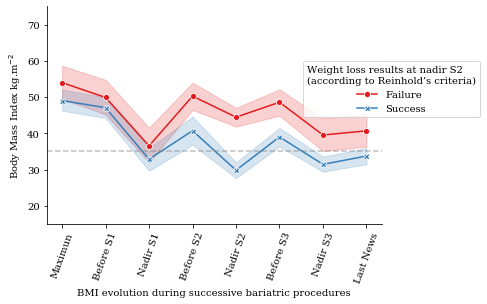

In [8]:
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
g = sns.lineplot(x='BMI evolution during successive bariatric procedures', y='Body Mass Index kg.m$^{-2}$',sort=False, hue='ReiholdsNadirC2',style = 'ReiholdsNadirC2' , palette='Set1', dashes = False, data=BMI3,   markers=True)
g.legend(bbox_to_anchor=(0.75, 0.77), ncol=1, labels=('Failure','Success'), title = "Weight loss results at nadir S2 \n(according to Reinhold’s criteria)" )
g.set(ylim=(15,75))

plt.xticks(rotation=70)
plt.axhline(35, ls='--', color = 'grey', alpha = 0.5)
sns.despine()

plt.savefig('EvolutionSurgeryReinholdC2_2.tiff', orientation = 'landscape', bbox_inches = 'tight', dpi=1000)
plt.savefig('EvolutionSurgeryReinholdC2_2.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:

g = sns.lineplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$',sort=False, hue='ReiholdsNadirC2',style = 'ReiholdsNadirC2' , palette='Set1', dashes = False, data=BMI3,  err_style=None, markers=True)
g.legend(bbox_to_anchor=(0.75, 0.77), ncol=1, labels=('Failure','Success'), title = "Weight loss results at nadir S2 \n(according to Rheinold’s criteria)" )

plt.xticks(rotation=70)
plt.axhline(35, ls='--', color = 'grey', alpha = 0.5)
sns.despine()

plt.savefig('EvolutionSurgeryReinholdC2_2.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionSurgeryReinholdC2_2.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:

g = sns.lineplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$',sort=False, hue='ReiholdsNadirC2',style = 'ReiholdsNadirC2' , palette='Set1', dashes = False, data=BMI3,  err_style='bars', markers=True)
g.legend(bbox_to_anchor=(0.75, 0.77), ncol=1, labels=('Failure','Success'), title = "Weight loss results at nadir S2 \n(according to Rheinold’s criteria)" )

plt.xticks(rotation=70)
plt.axhline(35, ls='--', color = 'grey', alpha = 0.5)
sns.despine()

plt.savefig('EvolutionSurgeryReinholdC2_3.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionSurgeryReinholdC2_3.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)

In [ ]:

g = sns.lineplot(x='BMI evolution along bariatric procedures', y='Body Mass Index kg.m$^{-2}$',sort=False, hue='ReiholdsNadirC2',style = 'ReiholdsNadirC2' , palette='Set1', dashes = False, data=BMI4,   markers=True)
g.legend(bbox_to_anchor=(0.75, 0.77), ncol=1, labels=('Failure','Success'), title = "Weight loss results at nadir S2 \n(according to Rheinold’s criteria)" )

plt.xticks(rotation=70)
plt.axhline(35, ls='--', color = 'grey', alpha = 0.5)
sns.despine()

plt.savefig('EvolutionSurgeryReinholdC2_3.png', orientation = 'landscape', bbox_inches = 'tight', dpi=900)
plt.savefig('EvolutionSurgeryReinholdC2_3.pdf', orientation = 'landscape', bbox_inches = 'tight', dpi=1200)